# **Easy Stable Diffusion**
Python notebook to run Stable Diffusion model in Google Colab.

**Note**: make sure to connect to a runtime instance with a GPU!

## 1. Setup
Run the cell below to install the dependencies.

In [ ]:
%%capture
!pip install diffusers["torch"] transformers
!pip install accelerate
!pip install git+https://github.com/huggingface/diffusers

## 2. Download and run the AI model
By running the cell below, we will download the AI model from huggingface and the AI model will be used for the image generation.

To select another AI model:


1.   Visit [civitai.com](https://civitai.com/models) and select the desired model.
2.   Go to [huggingface.co](https://huggingface.co/models) and search the model with the same name.
3.   Copy the model name from huggingface and set it in the variable *model* in the cell below. For example: "imagepipeline/pony-realism".
4. Run the cell.

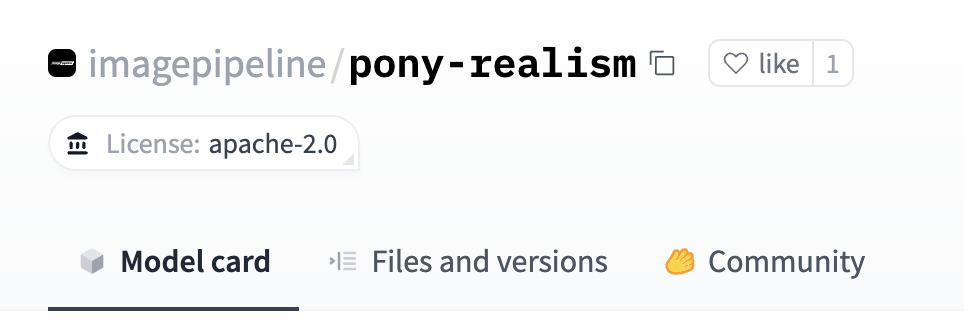

**Note**: make sure the model is not too heavy or it wont fit into the RAM!

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

model = "redstonehero/artuniverse_v40"

pipe = StableDiffusionPipeline.from_pretrained(model, torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.safety_checker = None

model_index.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

text_encoder/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/379 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--redstonehero--artuniverse_v40/snapshots/1f2026d16c2c9194782208949fcfb7fce44c62a2/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--redstonehero--artuniverse_v40/snapshots/1f2026d16c2c9194782208949fcfb7fce44c62a2/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--redstonehero--artuniverse_v40/snapshots/1f2026d16c2c9194782208949fcfb7fce44c62a2/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--redstonehero--artuniverse_v40/snapshots/1f2026d16c2c9194782208949fcfb7fce44c62a2/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: Fu

## 3. Input your promt and generate the image

  0%|          | 0/100 [00:00<?, ?it/s]

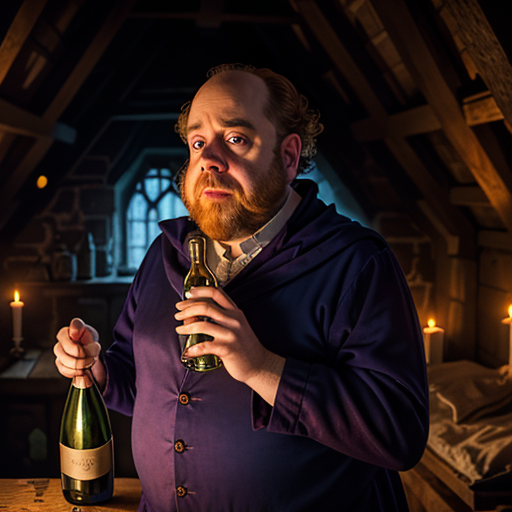

In [42]:
# Input
# Useful guideline for good prompting: https://docs.google.com/document/d/1sgXAnFMEfx-I_Harts7cEGEPAtmWGvl62yJHByPE0ZI/edit#
input = {
    'prompt': "photo RAW,(a yellowish transparent ghost holds a bottle of champagne in an attic room. he looks like a medieval paul giamatti. he is sneering. realistic painting), masterpiece, award winning photography, lighting, perfect composition, high detail, hyper realistic,dramatic lighting, epic, Burgundy and dark_blue colors",
    'negative_prompt': "low quality,medium quality, 3d,frame,bw,watermark,logo,((letters)),paint,draw,(text),(worst quality:2), (low quality:2), (normal quality:2), lowres, bad anatomy, bad hands, normal quality, ((monochrome)), ((grayscale))",
    'height': 512,
    'width': 512,
    'num_inference_steps': 50,
    'guidance_scale': 7,
    'num_inference_steps': 100,
}

# Generate image
image = pipe(**input).images[0]
image